Enter the type of random variable (Normal, Poisson, Gamma, Beta, Exponential, Uniform, or Binomial): gamma
Enter the alpha parameter of the Gamma distribution: 2
Enter the theta parameter of the Gamma distribution: 0.2
Enter the expression for Y in terms of X: e**X


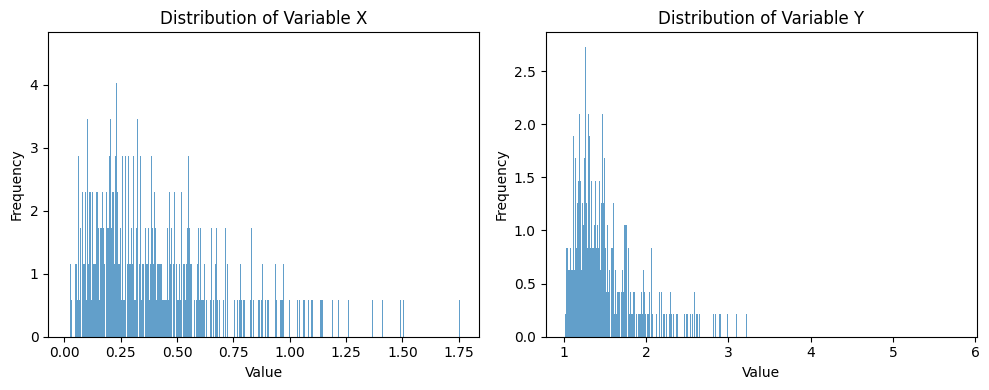

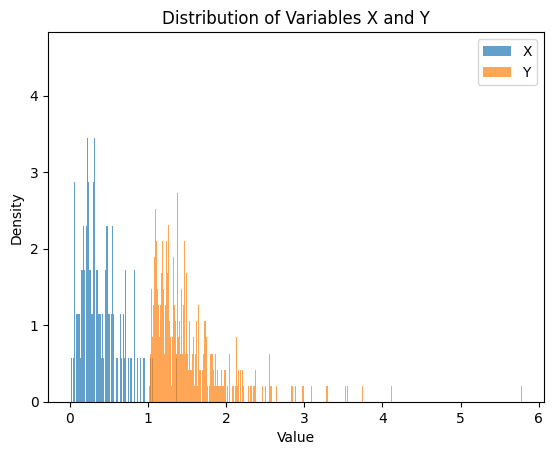

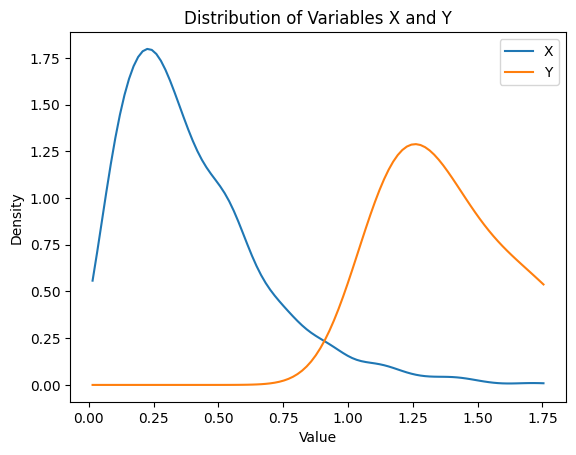

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Explicitly define common constants for the later step where the user is prompted to define Y in terms of X mathematically
e = math.e
pi = math.pi


# First Stage - Choosing which type of probability distribution X will follow

# Prompt user for the choice of random variable and its parameters
var_type = input("Enter the type of random variable (Normal, Poisson, Gamma, Beta, Exponential, Uniform, or Binomial): ")
# Standardize case to lower
var_type = var_type.lower()

# Conditional blocks to prompt user for the specific parameters required by each type of random variable
if var_type == "normal":
    mean = float(input("Enter the mean of the Normal distribution: "))
    std_dev = float(input("Enter the standard deviation of the Normal distribution: "))

elif var_type == "poisson":
    lam = float(input("Enter the lambda parameter of the Poisson distribution: "))

elif var_type == "gamma":
    alpha = float(input("Enter the alpha parameter of the Gamma distribution: "))
    theta = float(input("Enter the theta parameter of the Gamma distribution: "))

elif var_type == "beta":
    alpha = float(input("Enter the alpha parameter of the Beta distribution: "))
    beta = float(input("Enter the beta parameter of the Beta distribution: "))

elif var_type == "exponential":
    lam = float(input("Enter the lambda parameter of the Exponential distribution: "))

elif var_type == "uniform":
    a = float(input("Enter the lower bound of the Uniform distribution: "))
    b = float(input("Enter the upper bound of the Uniform distribution: "))

elif var_type == "binomial":
    n = int(input("Enter the number of trials of the Binomial distribution: "))
    p = float(input("Enter the probability of success of the Binomial distribution: "))

else:
    print("Invalid random variable type.")
    exit()


# Second Stage - Procuring values based on user input

# Generate random samples for variable X

num_samples = 1000

if var_type == "normal":
    X = np.random.normal(mean, std_dev, num_samples)

elif var_type == "poisson":
    X = np.random.poisson(lam, num_samples)

elif var_type == "gamma":
    X = np.random.gamma(alpha, theta, num_samples)

elif var_type == "beta":
    X = np.random.beta(alpha, beta, num_samples)

elif var_type == "exponential":
    X = np.random.exponential(lam, num_samples)

elif var_type == "uniform":
    X = np.random.uniform(a, b, num_samples)

elif var_type == "binomial":
    X = np.random.binomial(n, p, num_samples)
else:
  print("Invalid variable type")
  exit()

# Prompt user to define variable Y based on X
user_expression = input("Enter the expression for Y in terms of X: ")

# Use eval() to evaluate the user input as a mathematical input defined by an expression following Python syntax (eg. using ** for exponentiation rather than ^)
Y = eval(user_expression)

# Plot the distribution of random samples for X
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X, bins = num_samples, density=True, alpha=0.7)
plt.title("Distribution of Variable X")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot the distribution of random samples for Y
plt.subplot(1, 2, 2)
plt.hist(Y, bins = num_samples, density=True, alpha=0.7)
plt.title("Distribution of Variable Y")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot the distribution of random samples for X and Y overlayed
plt.hist(X, bins = num_samples, density=True, alpha=0.7, label="X")
plt.hist(Y, bins = num_samples, density=True, alpha=0.7, label="Y")
plt.title("Distribution of Variables X and Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

# Smooth curves using kernel density estimation (KDE)
kde_X = stats.gaussian_kde(X)
kde_Y = stats.gaussian_kde(Y)

# Plot the smooth curves for X and Y
x_vals = np.linspace(min(X), max(X), 100)
plt.plot(x_vals, kde_X(x_vals), label="X")
plt.plot(x_vals, kde_Y(x_vals), label="Y")
plt.title("Distribution of Variables X and Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()